In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# want to min_{{y_i}} E_X[ min_{y_i} || x - y_i || ]
# so, since we don't wanna do the math, we just take the MC estimate of this expectation
M = 5_000
samples = np.random.uniform(low=[0, 0], high=[1, 1], size=(M, 2))

In [135]:
N = 4
rps = np.random.random((N, 2))

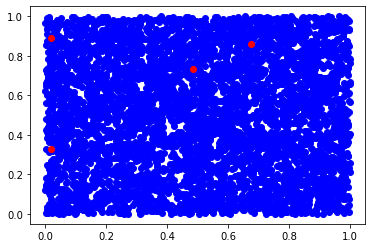

In [136]:
plt.scatter(samples[:,0], samples[:,1], color="b")
plt.scatter(rps[:,0], rps[:,1], color="r")

In [199]:
eta = 0.01
update_steps = 10_000

for _ in range(update_steps):
    tiled_samples = np.tile(samples, (N, 1, 1))
    tiled_rps = np.tile(rps, (M, 1, 1))
    tiled_rps = np.transpose(tiled_rps, (1, 0, 2))

    displacements = tiled_samples - tiled_rps
    distances = np.sum(displacements ** 2, axis=-1)
    rps_idx = np.argmin(distances, axis=0)

    for idx in range(N):
        relevant_displacements = displacements[idx,np.where(rps_idx == idx),:][0]
        grad = np.sum(relevant_displacements, axis=0) / len(relevant_displacements)
        rps[idx] += grad * eta

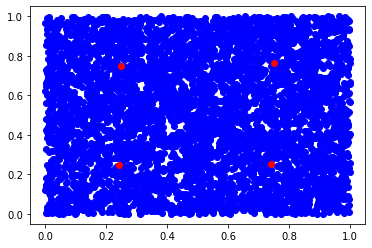

In [201]:
plt.scatter(samples[:,0], samples[:,1], color="b")
plt.scatter(rps[:,0], rps[:,1], color="r")